# **Premier projet : Construction d'un Score Éditorial Anime**

---

### Objectif du Notebook

Le but de ce notebook est de répondre à une question simple qui tourmente la communauté otaku depuis pourtant tant d'années :

> ## **"Quel est le meilleur animé ayant jamais existé ?"** 

Nous essayerons dans ce notebook de trouver la **solution de notation la plus juste et la plus représentative** de la qualité d'une œuvre.

---

## **Première étape : Récupération des données et importations des bibliothèques nécessaires.**

In [5]:
import pandas as pd

df = pd.read_csv('animes.csv')


In [14]:
df.head()

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


In [10]:
df.shape

(61, 17)

In [11]:
df.describe()

,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,61.000000,61.000000,61.000000,61.000000
mean,90.737705,8.316393,9.318033,6.719672
std,162.055227,0.521594,0.469932,1.369650
min,3.000000,6.000000,8.200000,0.000000
25%,24.000000,8.100000,9.100000,6.200000
50%,37.000000,8.400000,9.400000,7.200000
75%,76.000000,8.600000,9.700000,7.500000
max,1090.000000,9.300000,9.900000,8.400000


## **Deuxième étape : Nettoyage des données**

On regarde d'abord s'il y a des valeurs manquantes et le type de chaque colonne

In [19]:
df.isna().sum()

Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64

In [18]:
df.isna().mean() * 100

Anime                 0.000000
Genre_Tags            0.000000
Source                0.000000
Nb_Episodes           0.000000
Status                0.000000
Studio                0.000000
Date_Pub              0.000000
Note_Globale          0.000000
Note_Meilleur_Ep      0.000000
Meilleur_Ep_Titre     0.000000
Comm_Meilleur_Ep      0.000000
Note_Pire_Ep          0.000000
Pire_Ep_Titre         0.000000
Comm_Pire_Ep          0.000000
Comm_Saison_1         0.000000
Comm_Saison_2         0.000000
Comm_Saison_3        16.393443
dtype: float64

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              61 non-null     str    
 1   Genre_Tags         61 non-null     str    
 2   Source             61 non-null     str    
 3   Nb_Episodes        61 non-null     int64  
 4   Status             61 non-null     str    
 5   Studio             61 non-null     str    
 6   Date_Pub           61 non-null     str    
 7   Note_Globale       61 non-null     float64
 8   Note_Meilleur_Ep   61 non-null     float64
 9   Meilleur_Ep_Titre  61 non-null     str    
 10  Comm_Meilleur_Ep   61 non-null     str    
 11  Note_Pire_Ep       61 non-null     float64
 12  Pire_Ep_Titre      61 non-null     str    
 13  Comm_Pire_Ep       61 non-null     str    
 14  Comm_Saison_1      61 non-null     str    
 15  Comm_Saison_2      61 non-null     str    
 16  Comm_Saison_3      51 non-null     str 

On observe que des valeurs sont manquantes pour les commentaires des saisons 3 (certaines séries n'ayant tout simplement que 2 saisons). On va donc corriger ça. On va aussi transformer le format de la Date de publication qui est en string pour la mettre en datetime.
Enfin, une chose qui m'ennuie en regardant le dataset, c'est que les tags sont joints. C'est à dire que "Action / Shonen" sera traité différement de "Action / Sci Fi". Le tag "Action" ne sera pas compté une fois mais deux. Nous allons donc séparer les tags.

In [21]:
df['Date_Pub'] = pd.to_datetime(df['Date_Pub'])
genres_split = df['Genre_Tags'].str.get_dummies(sep=' / ')
df['Comm_Saison_3'] = df['Comm_Saison_3'].fillna("Aucun")

Maintenant que le dataset est nettoyé, on va ajouter de nouvelles features pour approfondir notre compréhension du dataset :

In [25]:
import numpy as np

df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']
df['Regularite'] = 10 - df['Ecart']

df['Longueur'] = np.log(df['Nb_Episodes'])

df.head()

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3,Ecart,Regularite,Longueur
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.,3.8,6.2,5.393628
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...,2.6,7.4,3.258097
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é...",3.5,6.5,5.673323
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo...",3.3,6.7,4.158883
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.,2.5,7.5,3.258097


## **Troisième étape : Analyse exploratoire des données**

On va d'abord observer la distribution des notes globales pour voir si ce critère est capable de répondre assurément à la problématique : Quel est le meilleur animé ?

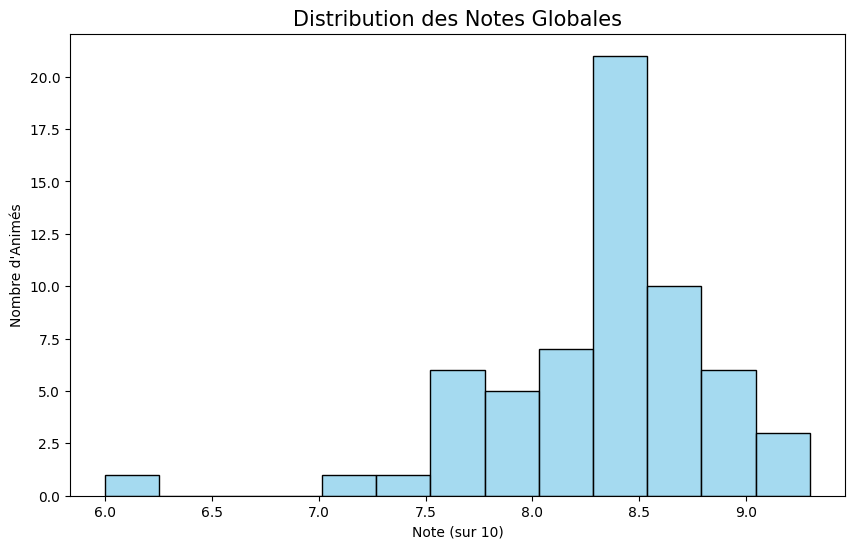

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(df['Note_Globale'], color='skyblue')

plt.title('Distribution des Notes Globales', fontsize=15)
plt.xlabel('Note (sur 10)')
plt.ylabel('Nombre d\'Animés')

plt.show()

On observe que la majeure partie des animés dans le dataset on leur note située entre 8 et 9. Cette concentration implique que la note globale seule n'est pas suffisante pour départager les animés.

On va maintenant observer si la normalisation de la longueur des animés a permit de lisser les animés entre eux.

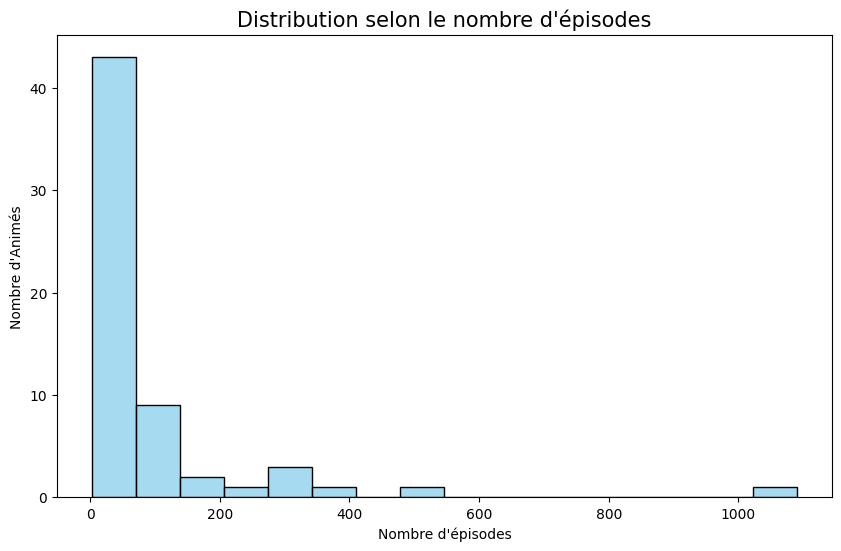

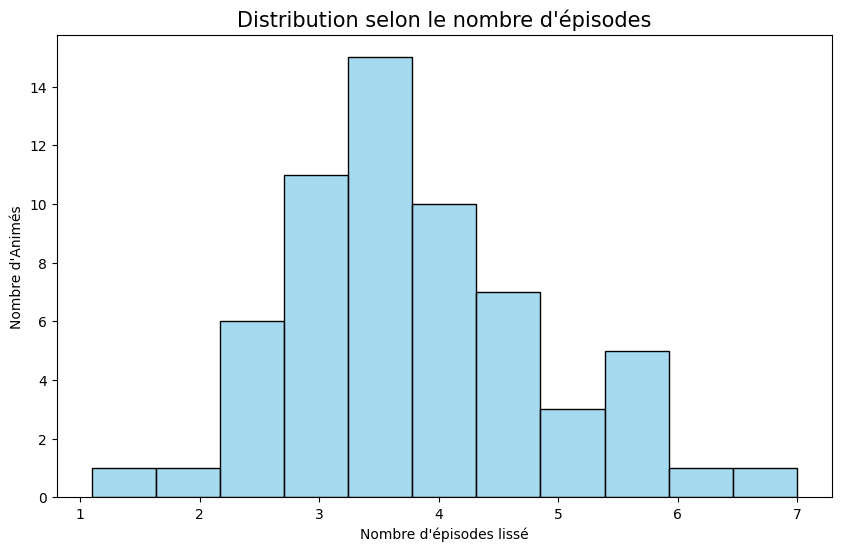

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Nb_Episodes'], color='skyblue')

plt.title("Distribution selon le nombre d'épisodes" , fontsize=15)
plt.xlabel("Nombre d'épisodes")
plt.ylabel('Nombre d\'Animés')

plt.show()

plt.figure(figsize=(10, 6))

sns.histplot(df['Longueur'], color='skyblue')

plt.title("Distribution selon le nombre d'épisodes" , fontsize=15)
plt.xlabel("Nombre d'épisodes lissé")
plt.ylabel('Nombre d\'Animés')

plt.show()

On observe que le nombre d'épisodes est mieux répartit sur l'histogramme 2, ce qui nous aidera dans la création de notre score composite plus tard.

On va maintenant regarder le lien de corrélation entre la note globale et la régularité, pour observer la pertinence de ce nouveau paramètre.

On va aussi regarder s'il y a un lien entre la longueur des animés et la note globale, pour voir si les animés longs sont récompensés ou pénalisés.

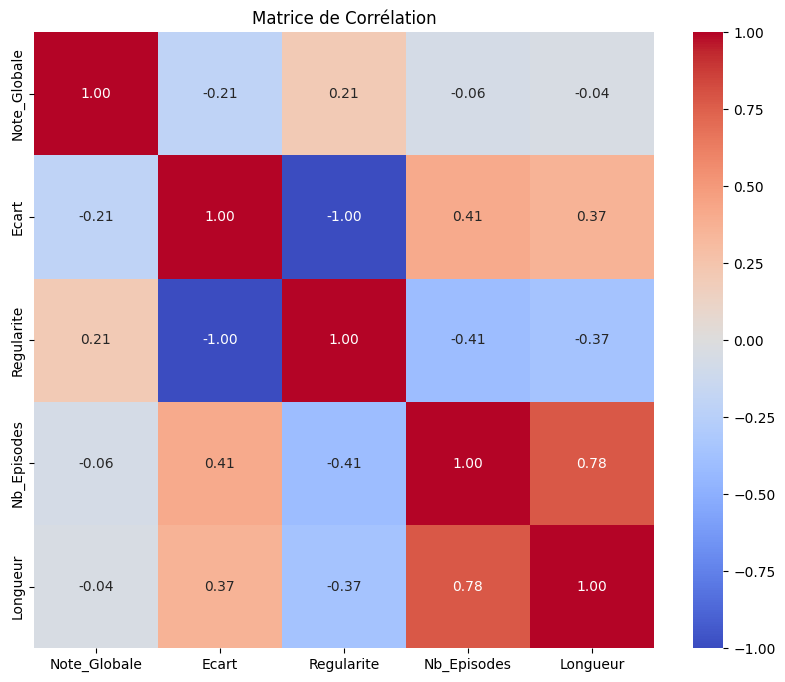

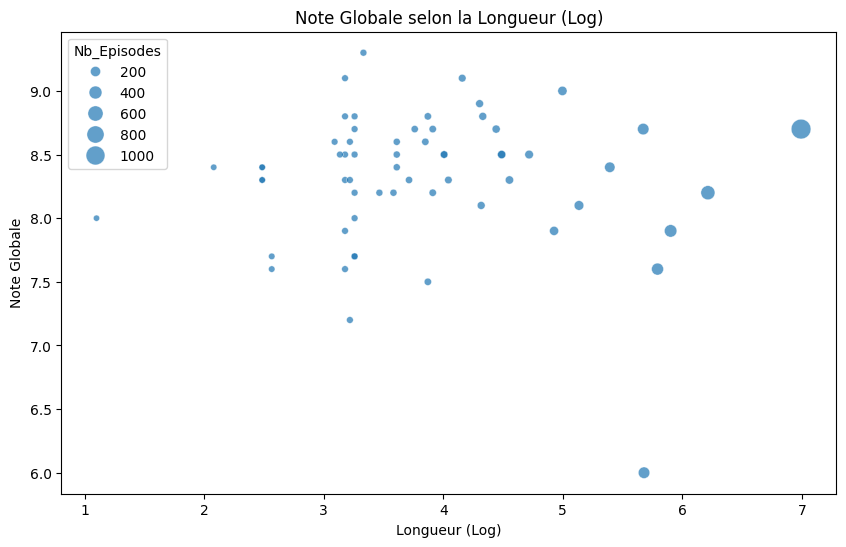

In [36]:

plt.figure(figsize=(10, 8))

cols_to_check = ['Note_Globale', 'Ecart', 'Regularite', 'Nb_Episodes', 'Longueur']
correlation_matrix = df[cols_to_check].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longueur', y='Note_Globale', size='Nb_Episodes', sizes=(20, 200), alpha=0.7)
plt.title('Note Globale selon la Longueur (Log)')
plt.xlabel('Longueur (Log)')
plt.ylabel('Note Globale')
plt.show()

On observe que l'indice de corrélation entre la régularité et la note globale est faible. Ils sont donc indépendants. La régularité sera donc un bonne indicateur pour construire notre note compositie.

La note globale semble légérement baisser plus l'animé est long. Pour approfondir cette théorie, on va observer la régularité de ces animés.

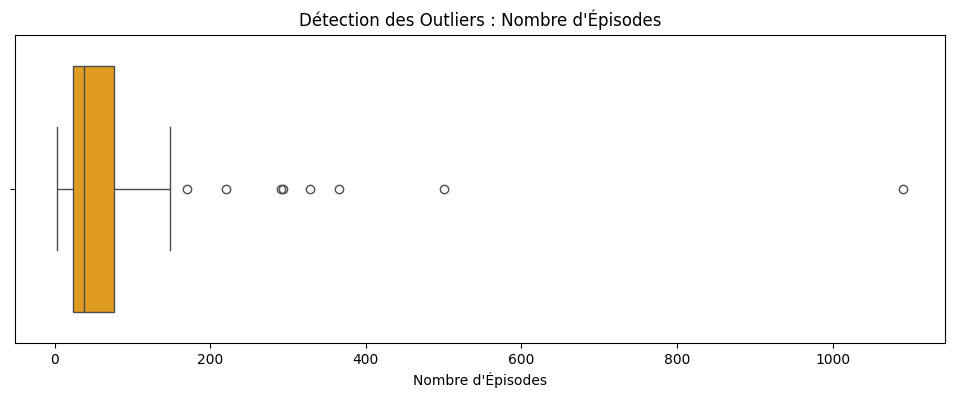

                              Anime  Nb_Episodes  Note_Globale  Regularite
8                         One Piece         1090           8.7         5.8
23                 Naruto Shippuden          500           8.2         4.6
26                           Bleach          366           7.9         5.1
54                       Fairy Tail          328           7.6         7.6
34  Boruto: Naruto Next Generations          293           6.0         4.4
2                     Dragon Ball Z          291           8.7         6.5
0                            Naruto          220           8.4         6.2
50                     Black Clover          170           8.1         3.0
19           Hunter x Hunter (2011)          148           9.0         6.2
25                 My Hero Academia          138           7.9         5.9


In [37]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df['Nb_Episodes'], color='orange')

plt.title('Détection des Outliers : Nombre d\'Épisodes')
plt.xlabel('Nombre d\'Épisodes')
plt.show()

top_longueur = df.sort_values(by='Nb_Episodes', ascending=False).head(10)

print(top_longueur[['Anime', 'Nb_Episodes', 'Note_Globale', 'Regularite']])

On voit que beaucoup de séries longues ont une régularité assez basse. Sans doute à cause d'épisodes filler ou de baisse de budget entre les productions. La qualité de l'animé est donc inégale.